# Fitness of yeast KO-strains in pesticidal environment (Atrazine)

A plate reader was used to test yeast KO-strains when treated with varying concentrations of pesticide.

## Data preprocessing
The xlsx file generated by the plate reader is put into a dataframe.

In [115]:
import pandas as pd
import numpy as np

def get_dataframe_from_xlsx(path):
    df = pd.read_excel(path,header=None)

    df_list = np.split(df, df[df.isnull().all(1)].index)
    df_list_new = []
    for i in range(len(df_list)):
        df = df_list[i]
        df.columns = df.iloc[0 if i == 0 else 1] #set header
        df = df.iloc[1 if i == 0 else 2:] #delete first row (header)
        df = df.set_index('Kinetic read') #set index
        df = df[df.columns.dropna()] #remove empty columns
        df = df.dropna() #remove all empty lines
        df_list_new.append(df)
    return pd.concat(df_list_new,axis=1)

df = get_dataframe_from_xlsx('../data/20200723_plate-fitness.xlsx')
df.head()

,A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,...,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
Kinetic read,,,,,,,,,,,,,,,,,,,,,
1900-01-01 00:04:22,0.143,0.144,0.154,0.196,0.154,0.178,0.153,0.135,0.221,0.155,...,0.429,0.54,0.445,0.1,0.474,0.507,0.606,0.501,0.617,0.501
1900-01-01 00:09:22,0.144,0.145,0.154,0.195,0.154,0.178,0.151,0.134,0.224,0.154,...,0.428,0.54,0.452,0.1,0.475,0.512,0.601,0.501,0.617,0.498
1900-01-01 00:14:22,0.144,0.145,0.153,0.194,0.155,0.179,0.151,0.134,0.223,0.155,...,0.428,0.541,0.454,0.1,0.476,0.514,0.597,0.503,0.617,0.5
1900-01-01 00:19:22,0.143,0.146,0.154,0.195,0.154,0.168,0.151,0.134,0.225,0.154,...,0.426,0.542,0.457,0.1,0.478,0.516,0.595,0.503,0.617,0.5
1900-01-01 00:24:22,0.142,0.145,0.153,0.195,0.154,0.17,0.151,0.135,0.226,0.153,...,0.426,0.541,0.457,0.1,0.478,0.517,0.589,0.502,0.617,0.497


The following function returns the list of indecies of the replicates for a given strain and concentration. This function depends on the loading pattern of the plate.

In [116]:
import string

alph = string.ascii_uppercase
def get_replicates_index(s,c): #s is the strain [0,1,2,3] and c the concentration [0,1,2,3,4,5]
    if s == 0:
        return [alph[s*2]+str(c+1),alph[s*2]+str((c+1)+6),alph[s*2+1]+str(c+1)]
    else:
        return [alph[s*2]+str(c+1),alph[s*2]+str((c+1)+6),alph[s*2+1]+str(c+1),alph[s*2+1]+str((c+1)+6)]

`get_series` returns the data points (mean of replicates) as well as the standard error of the mean. The very last measurement is excluded as the timestamp is the same as for the first measurement because the experiment did run for exactly 24h. Having the same time stamp for two measurements messes up the plots.

In [126]:
def get_series(df,s,c):
    i = get_replicates_index(s,c)
    return df[i][:-1].mean(axis=1), df[i].sem(axis=1)

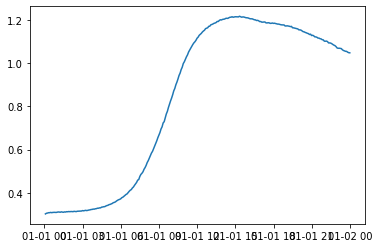

In [127]:
import matplotlib.pyplot as plt
y, se = get_series(df,0,5)
plt.plot(y)
plt.show()